In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In C:\Users\bkuro\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\bkuro\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\bkuro\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\bkuro\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\bkuro\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv('../google_review_ratings2.csv',header=0,index_col=False) 
df = df.set_index('user_id')
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs-bars,...,dance-clubs,swimming-pools,gyms,bakeries,beauty-spas,cafes,view-points,monuments,gardens,Unnamed: 25
user_id,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
df = df.drop('Unnamed: 25', 1)
df = df.drop('local-services', 1)
df = df.drop('hotels-lodgings', 1)
print(df.columns)

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs-bars', 'burger-pizza',
       'juice-bars', 'art-galleries', 'dance-clubs', 'swimming-pools', 'gyms',
       'bakeries', 'beauty-spas', 'cafes', 'view-points', 'monuments',
       'gardens'],
      dtype='object')


<ipython-input-3-676d9e614ba5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 25', 1)
<ipython-input-3-676d9e614ba5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('local-services', 1)
<ipython-input-3-676d9e614ba5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('hotels-lodgings', 1)


In [4]:
print('Missing values in dataset')
display(df.isnull().sum())
df = df.dropna()

Missing values in dataset


churches          0
resorts           0
beaches           0
parks             0
theatres          0
museums           0
malls             0
zoo               0
restaurants       0
pubs-bars         0
burger-pizza      1
juice-bars        0
art-galleries     0
dance-clubs       0
swimming-pools    0
gyms              0
bakeries          0
beauty-spas       0
cafes             0
view-points       0
monuments         0
gardens           1
dtype: int64

In [5]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs-bars,...,art-galleries,dance-clubs,swimming-pools,gyms,bakeries,beauty-spas,cafes,view-points,monuments,gardens
user_id,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [6]:
df.dtypes

churches          float64
resorts           float64
beaches           float64
parks             float64
theatres          float64
museums           float64
malls             float64
zoo               float64
restaurants       float64
pubs-bars         float64
burger-pizza      float64
juice-bars        float64
art-galleries     float64
dance-clubs       float64
swimming-pools    float64
gyms              float64
bakeries          float64
beauty-spas       float64
cafes             float64
view-points       float64
monuments         float64
gardens           float64
dtype: object

#### K-means with 4 investigations

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.ticker as ticker

#Original data
df_original = df

#Scaled Data
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[-1.75887873, -1.63217486,  0.91466317, ..., -1.09493605,
        -1.16335998, -1.33191196],
       [-1.75887873, -1.63217486,  0.91466317, ..., -1.09493605,
        -1.16335998, -1.33191196],
       [-1.75887873, -1.63217486,  0.91466317, ..., -1.09493605,
        -1.16335998, -1.33191196],
       ...,
       [-0.62314095,  1.8853711 ,  1.23533304, ...,  2.03462324,
         2.63586121, -0.38455166],
       [-0.61105863,  1.21703737,  1.25136653, ...,  2.03462324,
         2.63586121, -0.37601688],
       [-0.61105863,  1.23110755,  2.01295746, ...,  2.03462324,
         2.63586121, -0.33334299]])

#PCA without scaling
pca = PCA(n_components = 2,random_state=18)
df_PCA = pca.fit_transform(df_original)

#PCA with scaling
df_PCA_scaled = pca.fit_transform(df_scaled)

data_list = [df_original,df_scaled,df_PCA,df_PCA_scaled]
inertia_list = []
list_k = list(range(1, 30))

km = KMeans(n_clusters=4)
km.fit(df_original)

label = km.fit_predict(df_original)

filtered_label0 = df_original[label == 0]
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()
df_original["Labels"] = km.fit_predict(df_original)

#Run elbow to evaluate number of clusters
for i in range(len(data_list)):
    sse = []
    data = data_list[i]
    for k in list_k:
        km = KMeans(n_clusters=k,random_state=18)
        km.fit(data)
        sse.append(km.inertia_)
    inertia_list.append(sse)


result_ori = pd.DataFrame({'K':list_k,'Inertia':inertia_list[0],'data_type':'original'})
result_ori_scaled = pd.DataFrame({'K':list_k,'Inertia':inertia_list[1],'data_type':'original_scaled'})
result_PCA = pd.DataFrame({'K':list_k,'Inertia':inertia_list[2],'data_type':'PCA'})
result_PCA_scaled = pd.DataFrame({'K':list_k,'Inertia':inertia_list[3],'data_type':'PCA_scaled'})
result = result_ori.append(result_ori_scaled).append(result_PCA).append(result_PCA_scaled)

In [8]:
df_original.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs-bars,...,art-galleries,dance-clubs,swimming-pools,gyms,bakeries,beauty-spas,cafes,view-points,monuments,gardens
user_id,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


fig = plt.figure(figsize=(12,8))
g = sns.lineplot(data=result,x='K',y='Inertia',hue='data_type',linewidth=4,marker='o')
g.set_xlabel('Nummber of cluster', labelpad = 20)
g.set_ylabel('Inertia', labelpad = 20)
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
g.tick_params(which="both", bottom=True)
g.set_title('Selecting proper cluster number with elbow method',y=1.05, fontsize=20);

#Getting unique labels
 
u_labels = np.unique(label)
 
print(u_labels)
 
plt.scatter(df_original[:,0], df_original[:,1])

for i in u_labels:
    plt.scatter(df_original[label == i , 0] , df_original[label == i , 1] , label = i)
plt.legend()
plt.show()

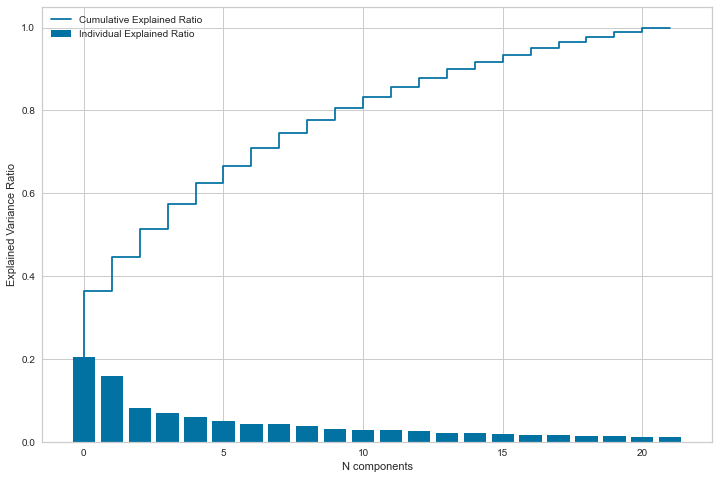

In [9]:
# Tally up pca s' necessary
pca = PCA()
pca.fit(df_original)
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12,8))
plt.bar(range(0,len(pca.explained_variance_ratio_)),
       pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues,
        label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

In [10]:
pca.explained_variance_ratio_

array([0.20517202, 0.15889183, 0.08209382, 0.06840786, 0.05979384,
       0.04958448, 0.04252991, 0.04180389, 0.03717345, 0.03162325,
       0.02776215, 0.02754588, 0.02523078, 0.02119969, 0.0201054 ,
       0.01860501, 0.01717645, 0.01555758, 0.01480272, 0.01272492,
       0.0114586 , 0.01075647])

In [11]:
pca = PCA(n_components = 4)
pca.fit(df_original)
df_pca = pd.DataFrame(pca.transform(df_original), columns=
                     ["PC1", "PC2", "PC3", "PC4"])

In [12]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-1.505292,-2.613536,-2.023522,-1.631026
1,-1.561815,-2.675679,-1.948605,-1.619610
2,-1.563968,-2.668326,-1.947506,-1.621105
3,-1.443384,-2.652443,-2.122383,-1.402459
4,-1.563968,-2.668326,-1.947506,-1.621105


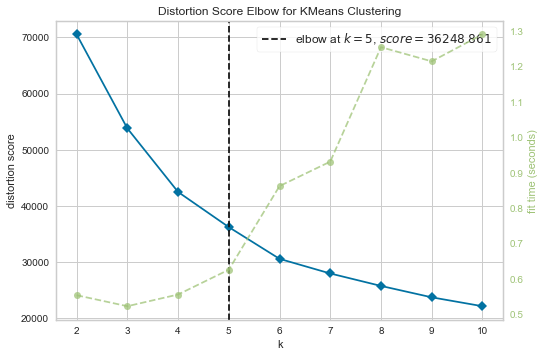

<Figure size 1800x720 with 0 Axes>

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
elbow_graph = KElbowVisualizer(KMeans(), k=10)
elbow_graph.fit(df_pca)
plt.figure(figsize=(25,10))
elbow_graph.show()

In [15]:
kmeans = KMeans(n_clusters=3, random_state=18)
predictions3 = kmeans.fit_predict(df_pca)
df_pca["Clusters3"] = predictions3
df_original["Clusters3"] = predictions3
total_evr3 = pca.explained_variance_ratio_.sum() * 100
#cluster1 = predictions.labels_

In [16]:
df_pca["PC1"]

0      -1.047001
1      -1.097938
2      -1.099997
3      -0.982710
4      -1.099997
          ...   
5449    4.645166
5450    5.518612
5451    5.924949
5452    4.717968
5453    5.901246
Name: PC1, Length: 5454, dtype: float64

C:\Users\bkuro\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


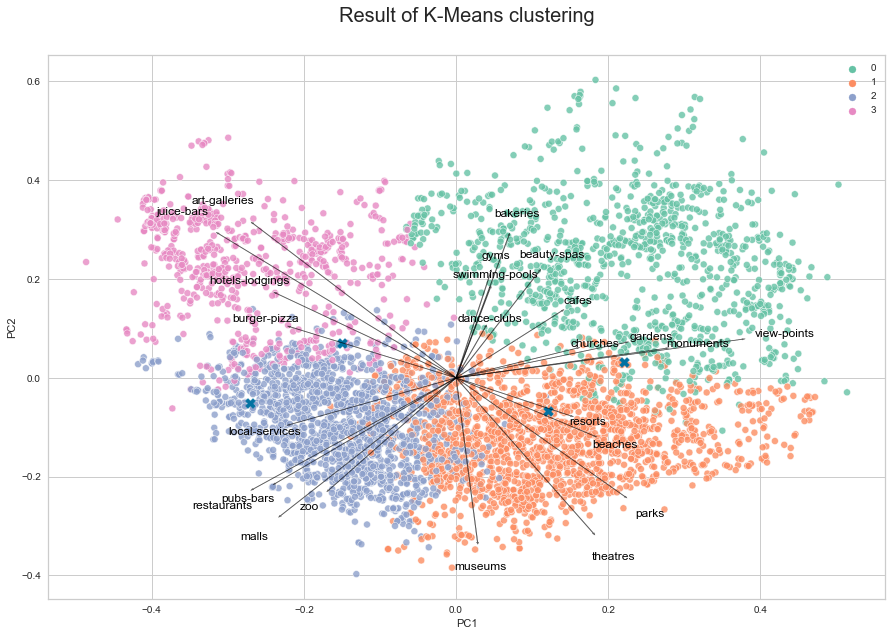

In [38]:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df_original.columns)
cluster = kmeans.labels_

xs = df_pca["PC1"]
ys = df_pca["PC2"]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

#scatter plot of each data point
g = sns.scatterplot(xs * scalex,ys * scaley,hue=cluster,palette='Set2',alpha=0.8)

#add cluster centroid
plt.scatter(x=kmeans.cluster_centers_[:,0]*scalex, y=kmeans.cluster_centers_[:,2]*scaley, color='b',s=100,marker='X')

#add EigenVector representing how each attraction categories related to PC1 and PC2
for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.6)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
        
        
g.set_xlabel("PC{}".format(1))
g.set_ylabel("PC{}".format(2))
g.set_title('Result of K-Means clustering',y=1.05, fontsize=20);
plt.savefig('Clustering Result.png')

coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df_original.columns)
cluster = kmeans.labels_

xs = df_pca["PC1"]
ys = df_pca["PC2"]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

#scatter plot of each data point
g = sns.scatterplot(xs * scalex,ys * scaley,hue=cluster,palette='Set2',alpha=0.8)

#add cluster centroid
plt.scatter(x=kmeans.cluster_centers_[:,0]*scalex, y=kmeans.cluster_centers_[:,2]*scaley, color='b',s=100,marker='X')

#add EigenVector representing how each attraction categories related to PC1 and PC2
for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
        
        
g.set_xlabel("PC{}".format(1))
g.set_ylabel("PC{}".format(2))
g.set_title('Result of K-Means clustering',y=1.05, fontsize=20);
plt.savefig('Clustering Result.png')

<function matplotlib.pyplot.show(close=None, block=None)>

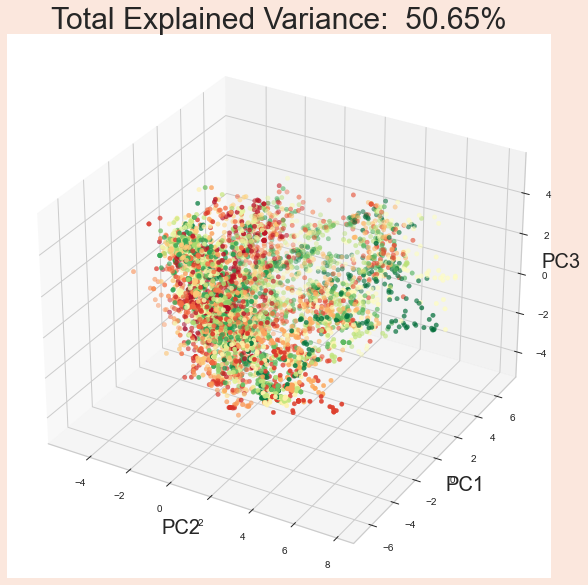

In [24]:
fig = plt.figure(figsize=(15,10),facecolor="#fbe7dd")
ax = fig.add_subplot(projection='3d')
y= df_pca["PC1"]
x= df_pca["PC2"]
z= df_pca["PC3"]
cm = plt.get_cmap("RdYlGn")
col = [cm(float(i)/(len(z))) for i in range(len(z))]
ax.scatter(x,y,z,c=col,s=20,marker='o')
ax.set_ylabel('PC1',fontsize=20)
ax.set_xlabel('PC2',fontsize=20)
ax.set_zlabel('PC3',fontsize=20)
total_evr = pca.explained_variance_ratio_.sum() * 100
ax.set_title(f"Total Explained Variance: {total_evr: .2f}%",
            fontsize=30)
plt.show

In [25]:
df_original.head(50)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs-bars,...,dance-clubs,swimming-pools,gyms,bakeries,beauty-spas,cafes,view-points,monuments,gardens,Clusters3
user_id,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.59,0.50,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0
User 6,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,...,0.59,0.50,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0
User 7,0.00,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0
User 8,0.00,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,...,0.60,0.50,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0
User 9,0.00,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,...,0.60,0.00,0.0,0.5,0.00,0.00,0.00,0.00,0.00,0


In [24]:
kmeans = KMeans(n_clusters=4, random_state=18)
predictions4 = kmeans.fit_predict(df_pca)
df_pca["Clusters4"] = predictions4
df_original["Clusters4"] = predictions4
total_evr4 = pca.explained_variance_ratio_.sum() * 100
#cluster2 = predictions.labels_

C:\Users\bkuro\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


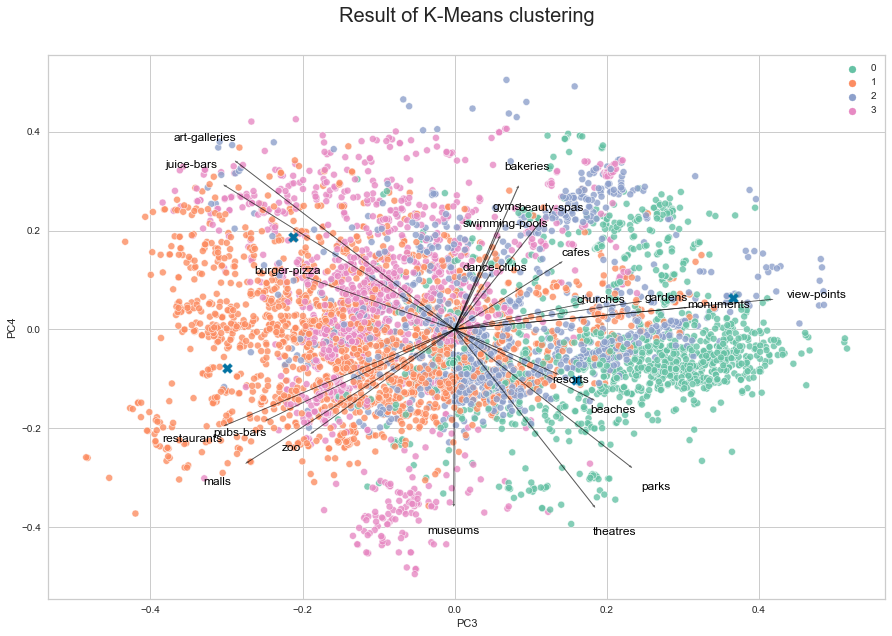

In [29]:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df_original.columns)
cluster = kmeans.labels_

xs = df_pca["PC3"]
ys = df_pca["PC4"]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

#scatter plot of each data point
g = sns.scatterplot(xs * scalex,ys * scaley,hue=cluster,palette='Set2',alpha=0.8)

#add cluster centroid
plt.scatter(x=kmeans.cluster_centers_[:,0]*scalex, y=kmeans.cluster_centers_[:,2]*scaley, color='b',s=100,marker='X')

#add EigenVector representing how each attraction categories related to PC1 and PC2
for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.6)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
        
        
g.set_xlabel("PC{}".format(3))
g.set_ylabel("PC{}".format(4))
g.set_title('Result of K-Means clustering',y=1.05, fontsize=20);
plt.savefig('Clustering Result.png')

In [32]:
kmeans = KMeans(n_clusters=5, random_state=18)
predictions5 = kmeans.fit_predict(df_pca)
df_pca["Clusters5"] = predictions5
df_original["Clusters5"] = predictions5
total_evr5 = pca.explained_variance_ratio_.sum() * 100
#cluster3 = predictions.labels_

In [33]:
df_original.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs-bars,...,swimming-pools,gyms,bakeries,beauty-spas,cafes,view-points,monuments,gardens,Clusters4,Clusters5
user_id,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1


C:\Users\bkuro\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


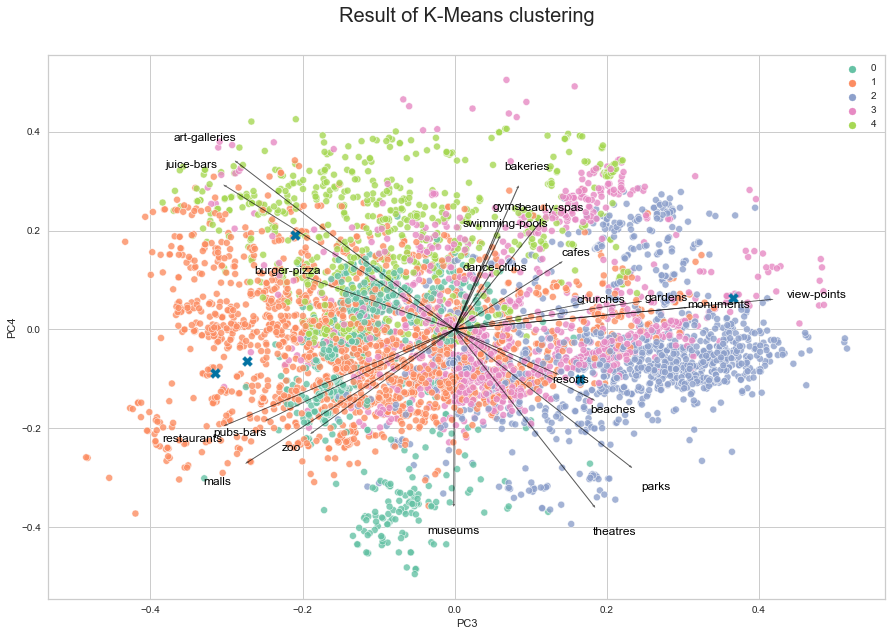

In [40]:
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
labels = list(df_original.columns)
cluster = kmeans.labels_

xs = df_pca["PC3"]
ys = df_pca["PC4"]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig = plt.figure(figsize=(15,10))

#scatter plot of each data point
g = sns.scatterplot(xs * scalex,ys * scaley,hue=cluster,palette='Set2',alpha=0.8)

#add cluster centroid
plt.scatter(x=kmeans.cluster_centers_[:,0]*scalex, y=kmeans.cluster_centers_[:,2]*scaley, color='b',s=100,marker='X')

#add EigenVector representing how each attraction categories related to PC1 and PC2
for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.6)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
        
        
g.set_xlabel("PC{}".format(3))
g.set_ylabel("PC{}".format(4))
g.set_title('Result of K-Means clustering',y=1.05, fontsize=20);
plt.savefig('Clustering Result.png')

In [48]:
df_super = df_original

In [49]:
df_super.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs-bars,...,gyms,bakeries,beauty-spas,cafes,view-points,monuments,gardens,Clusters3,Clusters4,Clusters5
user_id,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1,0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1,0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1,0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1,0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0,1,0


In [50]:
df_super.to_csv('clustered_google_data_many.csv')

In [35]:
df_original.to_csv('clustered_gd_noLSH.csv')

In [30]:
fig = plt.figure(figsize = (20,10))
exercise = sns.load_dataset("exercise")
g = sns.catplot(y='categories',x='value',data=df_original,kind='bar',
                palette='Set3',ci=None,estimator=np.median,col = 'Clusters4',
               height = 12,aspect=0.4,
               facet_kws={'xlim':(0,5)})
fig.tight_layout(pad=0.5)
g.fig.suptitle('Review rating of each cluster',y=1.05,ha='center')
plt.savefig('Review rating of each cluster')

ValueError: Could not interpret input 'value'

<Figure size 1440x720 with 0 Axes>

## Test spectral custering (later)

In [51]:
from sklearn.cluster import SpectralClustering

In [52]:
df2 = df

In [53]:
spectral_cluster_model= SpectralClustering(
    n_clusters=4, 
    random_state=25, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)

In [54]:
df2['cluster'] = spectral_cluster_model.fit_predict(df2)

C:\Users\bkuro\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


ValueError: Could not interpret value `church` for parameter `x`

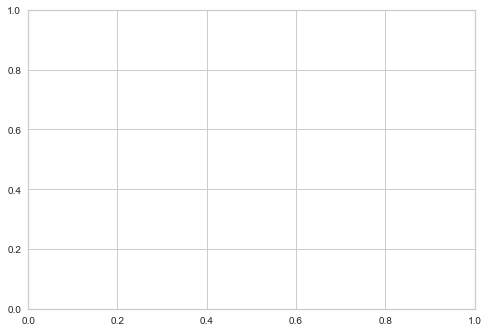

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(x='church', y='park', data=df2, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')

In [58]:
#df2 = df2.drop(columns = ['Clusters3','Clusters4','Clusters5'])